#TUIA - Aprendizaje Automático 1

##Trabajo práctico N°2: Clasificación

Integrantes:
- Oviedo, María Victoria
- Brizuela Cipolletti, Sofía

##Descripción del trabajo

Para realizar este trabajo, utilizaremos el dataset 'weatherAUS.csv' que contiene información climática de Australia de los últimos años.

El objetivo es la predicción de la variable 'RainTomorrow' en función del resto de las características.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en una cierta cantidad de ciudades.

Para la elección de las ciudades, vamos a obtener los valores únicos de la columna 'Location' del dataset y ejecutar una línea de código para elegirlas de forma aleatoria 10 ciudades, sobre las cuales trabajaremos a lo largo de todo el trabajo práctico.


In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TUIA/AA1/weatherAUS.csv", sep = ',')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data = pd.read_csv("weatherAUS.csv", sep = ',')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Selección aleatoria de 10 ciudades

In [ ]:
# Obtenemos las localidades únicas
unique_locations = data['Location'].unique()
# Elegimos aleatoriamente 10 ciudades
cities = pd.Series(unique_locations).sample(10, random_state=42)

print('Las ciudades seleccionadas son:' , cities)

Las ciudades seleccionadas son: 13     Williamtown
45    AliceSprings
47       Katherine
44      Launceston
17     MountGinini
27        Dartmoor
26        Watsonia
25        Portland
31      Townsville
19         Bendigo
dtype: object


In [ ]:
# Creamos un nuevo dataframe en donde filtramos por las ciudades elegidas aleatoriamente
df = data[data['Location'].isin(cities)]
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
39538,2009-01-01,Williamtown,15.2,34.0,0.0,11.6,9.2,NW,41.0,WNW,...,62.0,36.0,1005.2,1001.5,3.0,6.0,23.7,28.7,No,No
39539,2009-01-02,Williamtown,18.3,24.5,0.0,8.8,9.4,S,54.0,S,...,61.0,57.0,1012.1,1011.7,3.0,2.0,21.6,23.4,No,No
39540,2009-01-03,Williamtown,16.8,23.5,0.4,8.4,0.4,NE,37.0,ESE,...,60.0,58.0,1020.4,1018.4,7.0,7.0,20.1,21.7,No,No
39541,2009-01-04,Williamtown,17.5,27.8,0.0,5.0,12.0,E,50.0,NE,...,60.0,51.0,1018.4,1014.6,1.0,1.0,22.7,26.4,No,No
39542,2009-01-05,Williamtown,14.8,36.0,0.0,8.6,11.9,ENE,37.0,NNW,...,67.0,39.0,1013.6,1008.7,2.0,3.0,22.5,33.8,No,No


## Análisis descriptivo y exploratorio

El dataset cuenta con las siguientes variables:
1. **Date**: Fecha en la que se realizaron las observaciones meteorológicas
2. **Location**: Ciudad donde se realizó la medición del clima
3. **MinTemp**: Temperatura mínima registrada durante el día (grados Celsius)
4. **MaxTemp**: Temperatura máxima registrada durante el día (grados Celsius)
5. **Rainfall**: Cantidad de precipitación registrada para el día (milímetros)
6. **Evaporation**: Cantidad estimada de agua evaporada en el día (milímetros)
7. **Sunshine**: Cantidad de horas de sol durante el día
8. **WindGustDir**: Dirección del viento en el momento de la ráfaga de viento más fuerte del día
9. **WindGustSpeed**: Velocidad del viento en la ráfaga más fuerte del día (km/h)
10. **WindDir9am**: Dirección del viento a las 9am
11. **WindDir3pm**: Dirección del viento a las 3pm
12. **WindSpeed9am**: Velocidad del viento a las 9am (km/h)
13. **WindSpeed3pm**: Velocidad del viento a las 3pm (km/h)
14. **Humidity9am**: Humedad relativa a las 9am (porcentaje %)
15. **Humidity3pm**: Humedad relativa a las 3pm (porcentaje %)
16. **Pressure9am**: Presión atmosférica las 9am (hectopascales hPa)
17. **Pressure3pm**: Presión atmosférica a las 3pm (hectopascales hPa)
18. **Cloud9am**: Cobertura nubosa a las 9am (octavos)
19. **Cloud3pm**: Cobertura nubosa a las 3pm (octavos)
20. **Temp9am**: Temperatura a las 9am (grados Celsius)
21. **Temp3pm**: Temperatura registrada a las 3pm (grados Celsius)
22. **RainToday**: Variable categórica binaria (Sí/No) que indica si llovió en el día actual
23. **RainTomorrow**: Variable categórica binaria (Sí/No) que indica si lloverá al día siguiente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28814 entries, 39538 to 143881
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           28814 non-null  object 
 1   Location       28814 non-null  object 
 2   MinTemp        28576 non-null  float64
 3   MaxTemp        28640 non-null  float64
 4   Rainfall       28084 non-null  float64
 5   Evaporation    18737 non-null  float64
 6   Sunshine       14632 non-null  float64
 7   WindGustDir    28040 non-null  object 
 8   WindGustSpeed  28043 non-null  float64
 9   WindDir9am     26551 non-null  object 
 10  WindDir3pm     28304 non-null  object 
 11  WindSpeed9am   28494 non-null  float64
 12  WindSpeed3pm   28498 non-null  float64
 13  Humidity9am    27982 non-null  float64
 14  Humidity3pm    27405 non-null  float64
 15  Pressure9am    24514 non-null  float64
 16  Pressure3pm    24517 non-null  float64
 17  Cloud9am       17919 non-null  float64
 18  Cloud3

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Verificamos valores faltantes
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,238
MaxTemp,174
Rainfall,730
Evaporation,10077
Sunshine,14182
WindGustDir,774
WindGustSpeed,771
WindDir9am,2263


El dataset cuenta con 23 columnas y un total de 28814 registros, siendo la mayoría de las variables de tipo object (variables categóricas) o float64 (variables númericas).

Casi todas las variables tienen valores faltantes, en donde la mayor cantidad se concentra en Sunshine (cantidad de horas de luz solar), Evaporation (evaporación), Cloud9am y Cloud3am (cobertura nubosa).

In [ ]:
# Resumen descriptivo de las variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,28576.000000,28640.000000,28084.000000,18737.000000,14632.000000,28043.000000,28494.000000,28498.000000,27982.000000,27405.000000,24514.000000,24517.000000,17919.000000,17164.000000,28212.000000,27703.000000
mean,11.085414,22.247437,2.402197,5.766686,7.417749,39.948971,13.343300,18.369429,70.997105,54.104944,1016.993681,1014.572403,4.533624,4.619786,16.014380,20.587189
std,7.100826,8.464012,8.383588,4.444280,3.894355,13.134511,8.207158,8.140635,21.508288,22.295235,7.266884,7.340365,2.939539,2.759977,7.693444,8.156476
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,1.000000,985.000000,980.200000,0.000000,0.000000,-7.200000,-5.400000
25%,6.100000,15.800000,0.000000,2.600000,4.300000,31.000000,7.000000,13.000000,59.000000,39.000000,1012.200000,1009.500000,1.000000,2.000000,10.600000,14.500000
50%,10.400000,21.400000,0.000000,5.200000,8.200000,39.000000,13.000000,19.000000,73.000000,55.000000,1017.000000,1014.500000,5.000000,5.000000,15.000000,19.800000
75%,15.700000,28.800000,0.800000,7.800000,10.700000,46.000000,19.000000,24.000000,89.000000,69.000000,1021.800000,1019.500000,7.000000,7.000000,21.600000,26.600000
max,30.300000,46.700000,236.800000,145.000000,14.300000,135.000000,65.000000,72.000000,100.000000,100.000000,1040.500000,1039.600000,8.000000,8.000000,39.100000,45.200000


Decidimos eliminar las filas donde la variable target ('RainTomorrow') sea nula, y luego, eliminamos las filas que contengan más de 10 valores faltantes dado que consideramos que la información es insuficiente para realizar el análisis (los datos eliminados no representan mas del 5% de los datos totales).

In [ ]:
df = df.dropna(subset=['RainTomorrow'])

In [ ]:
# Luego se eliminan las filas que tengan más de 10 variables faltantes
df = df.dropna(thresh=df.shape[1] - 10)

In [ ]:
# Convertimos la variable Date a tipo date
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Creamos una función para determinar la estación correspondiente a cada fecha,
# ya que no es lo mismo predecir la lluvia en un día de verano que hacerlo en un día de invierno, por decir un ejemplo

def estacion(date):
    mes = date.month
    if mes in [12, 1, 2]:
        return 'Verano'
    elif mes in [3, 4, 5]:
        return 'Otoño'
    elif mes in [6, 7, 8]:
        return 'Invierno'
    else:
        return 'Primavera'

df['Season'] = df['Date'].apply(estacion)

## División del dataset

Realizamos la división del dataset en train y test, del cual separamos un 80% para entrenamiento y el 20% restante para prueba

In [ ]:
# División de los datos en train y test
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

# Validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42)

X_train = pd.DataFrame(X_train,columns = df.drop(columns='RainTomorrow').columns).reset_index(drop=True)
X_test = pd.DataFrame(X_test,columns = df.drop(columns='RainTomorrow').columns).reset_index(drop=True)
y_train = pd.DataFrame(y_train, columns=['RainTomorrow']).reset_index(drop=True)
y_test = pd.DataFrame(y_test, columns=['RainTomorrow']).reset_index(drop=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22291 entries, 0 to 22290
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           22291 non-null  datetime64[ns]
 1   Location       22291 non-null  object        
 2   MinTemp        22240 non-null  float64       
 3   MaxTemp        22269 non-null  float64       
 4   Rainfall       22088 non-null  float64       
 5   Evaporation    14823 non-null  float64       
 6   Sunshine       11658 non-null  float64       
 7   WindGustDir    21967 non-null  object        
 8   WindGustSpeed  21969 non-null  float64       
 9   WindDir9am     20749 non-null  object        
 10  WindDir3pm     22064 non-null  object        
 11  WindSpeed9am   22259 non-null  float64       
 12  WindSpeed3pm   22221 non-null  float64       
 13  Humidity9am    21865 non-null  float64       
 14  Humidity3pm    21363 non-null  float64       
 15  Pressure9am    1918

In [ ]:
# Verificamos los valores nulos
X_train.isnull().sum()

,0
Date,0
Location,0
MinTemp,51
MaxTemp,22
Rainfall,203
Evaporation,7468
Sunshine,10633
WindGustDir,324
WindGustSpeed,322
WindDir9am,1542


In [ ]:
# Verificamos que no haya columnas duplicadas
X_train.duplicated().sum()

0

## Imputación de valores faltantes

In [ ]:
# Hacemos una función para imputar los valores faltantes de las variables categóricas con la moda
def categoricas_faltantes(train_data, test_data):
    """
    Esta función permite imputar los valores faltantes de las variables categóricas.
    Los parámetros que recibe esta función son:
    - train_data: DataFrame que contiene los datos de entrenamiento
    - test_data: DataFrame que contiene los datos de prueba
    """
    # Identificamos las columnas categóricas
    variables_categoricas = train_data.select_dtypes(include=['object', 'bool']).columns.tolist()

    # Impoutamos los valores faltantes con la moda de cada variable en el conjunto de entrenamiento
    for var in variables_categoricas:
        mode_value = train_data[var].mode()[0]
        train_data[var] = train_data[var].fillna(mode_value)
        test_data[var] = test_data[var].fillna(mode_value)

    return train_data, test_data

In [ ]:
# Hacemos otra función para imputar los valores faltantes de las variables numéricas con la mediana
def numericas_faltantes(train_data, test_data):
    """
    Esta función permite imputar los valores faltantes de las variables numéricas.
     Los parámetros que recibe esta función son:
    - train_data: DataFrame que contiene los datos de entrenamiento
    - test_data: DataFrame que contiene los datos de prueba
    """
    # Seleccionamos las variables numéricas
    variables_numericas = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Imputamos los valores faltantes con la mediana de cada variable en el conjunto de entrenamiento
    for column in variables_numericas:
        median_value = train_data[column].median()
        train_data[column] = train_data[column].fillna(median_value)
        test_data[column] = test_data[column].fillna(median_value)

    return train_data, test_data

##### Decidimos imputar con la moda a los valores faltantes de las variables categóricas, mientras que, en las variables numéricas, imputamos con la mediana

In [ ]:
# Concatenar con la variable objetivo
data_train = pd.concat([X_train, pd.DataFrame(y_train, columns=['RainTomorrow'])], axis=1)
data_test = pd.concat([X_test, pd.DataFrame(y_test, columns=['RainTomorrow'])], axis=1)

# Imputamos los valores faltantes
data_train, data_test = categoricas_faltantes(data_train, data_test)
data_train, data_test = numericas_faltantes(data_train, data_test)

# Verificar después de la imputación
print(data_train.isnull().sum())
print(data_test.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Season           0
RainTomorrow     0
dtype: int64
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Season           0
RainTomorrow     0
dtype: int64


In [ ]:
# Resumen estadístico de data_train
data_train.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,22291,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000,22291.000000
mean,2013-05-21 13:09:55.774079232,11.153780,22.380310,2.339303,5.600749,7.789852,39.838590,13.284868,18.319097,70.862635,53.904760,1016.996151,1014.567058,4.679736,4.759769,16.058683,20.654331
min,2008-12-01 00:00:00,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,986.200000,985.200000,0.000000,0.000000,-7.200000,-5.400000
25%,2011-03-12 00:00:00,6.200000,15.800000,0.000000,4.000000,8.000000,31.000000,7.000000,13.000000,59.000000,39.000000,1013.000000,1010.400000,3.000000,4.000000,10.600000,14.700000
50%,2013-07-30 00:00:00,10.400000,21.600000,0.000000,5.200000,8.200000,39.000000,13.000000,19.000000,73.000000,55.000000,1017.000000,1014.500000,5.000000,5.000000,15.000000,19.900000
75%,2015-07-16 00:00:00,15.800000,28.900000,0.800000,6.400000,8.500000,46.000000,19.000000,24.000000,88.000000,68.000000,1020.900000,1018.600000,7.000000,6.000000,21.600000,26.500000
max,2017-06-25 00:00:00,30.300000,46.700000,236.800000,145.000000,14.300000,135.000000,65.000000,72.000000,100.000000,100.000000,1040.500000,1039.600000,8.000000,8.000000,39.100000,45.200000
std,NaN,7.082755,8.415884,8.381208,3.681688,2.838606,12.978644,8.153114,8.113349,21.299989,21.760723,6.739535,6.813122,2.349466,2.152847,7.659409,8.000082


##Visualización de datos

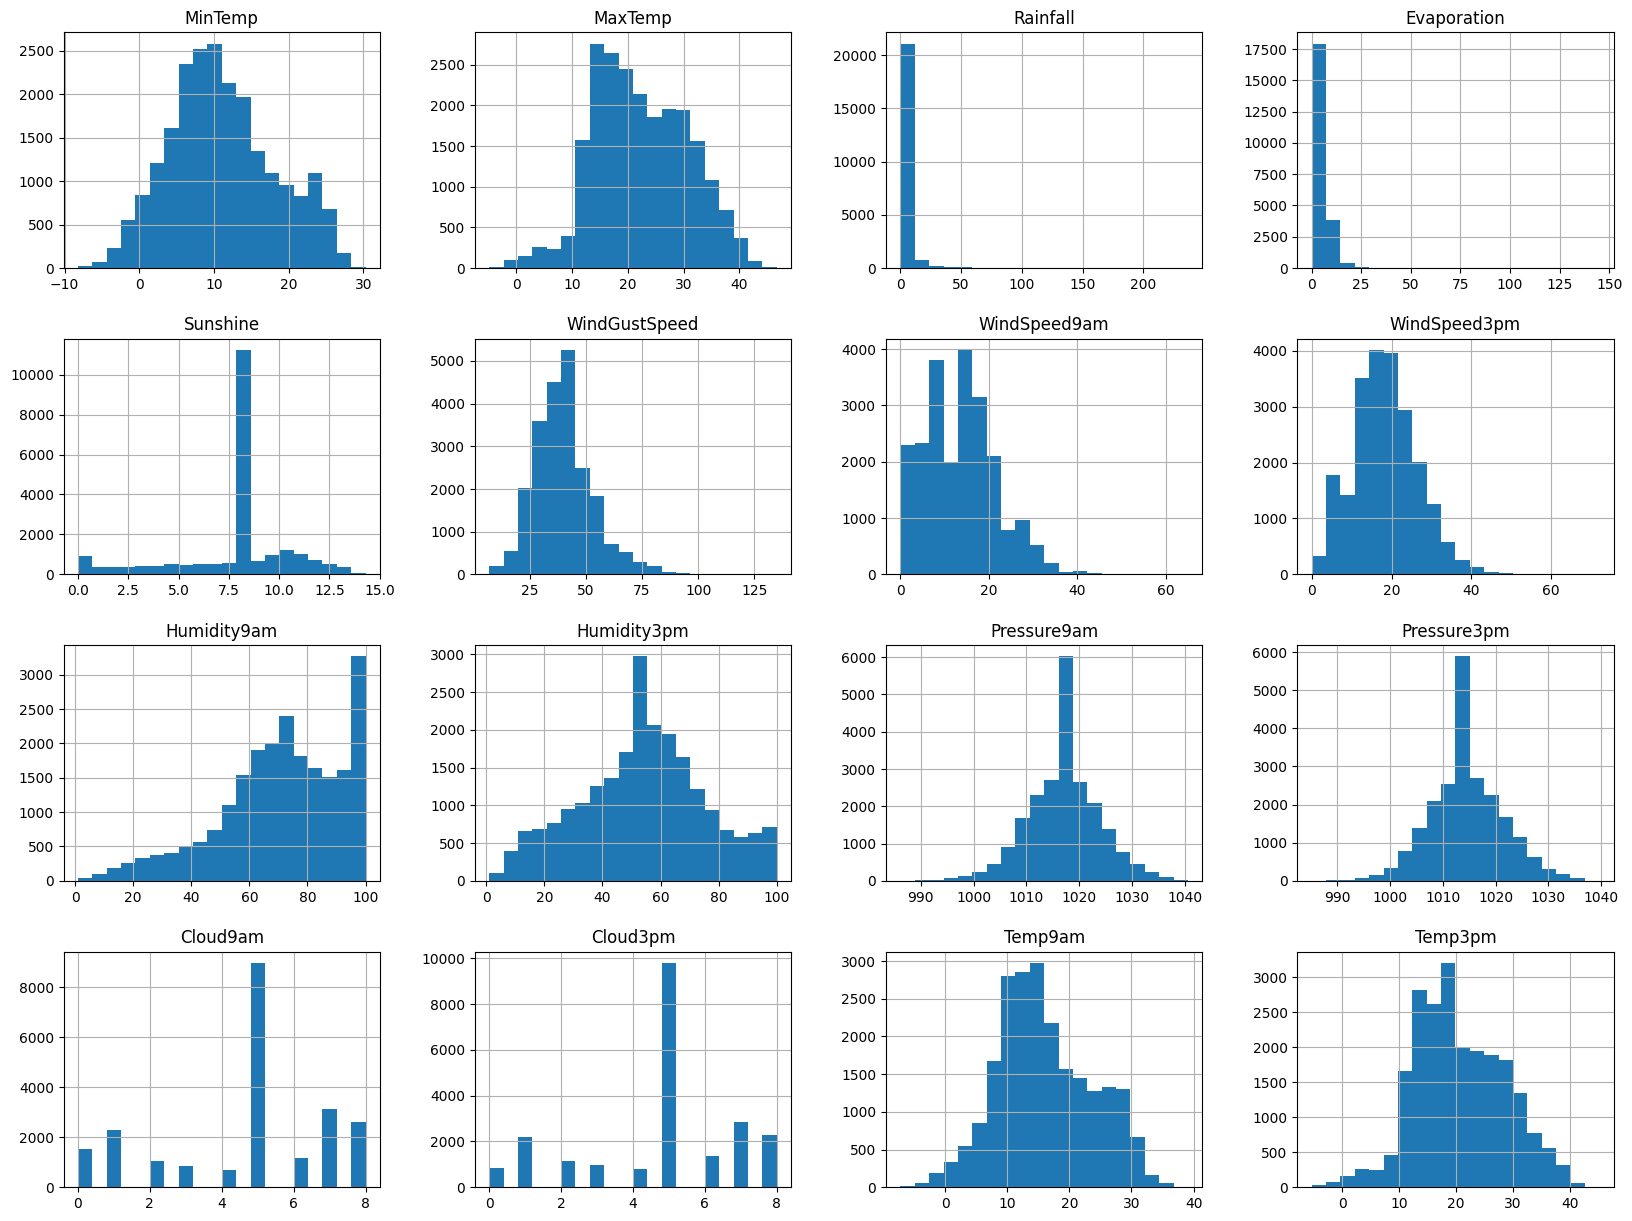

In [ ]:
# Seleccionamos solo las columnas numéricas
numerical_data = data_train.select_dtypes(include=['number'])

# Visualización de las distribuciones de las variables numéricas
numerical_data.hist(bins=20, figsize=(20,15))
plt.show()

###Codificación de variables

In [ ]:
#Convertimos las variables 'Yes' y 'No', en 1 y 0 respectivamente
data_train.RainToday = data_train.RainToday.map({'Yes':1, 'No':0})
data_test.RainToday = data_test.RainToday.map({'Yes':1, 'No':0})
data_train.RainTomorrow = data_train.RainTomorrow.map({'Yes':1, 'No':0})
data_test.RainTomorrow = data_test.RainTomorrow.map({'Yes':1, 'No':0})

###Matriz de correlación

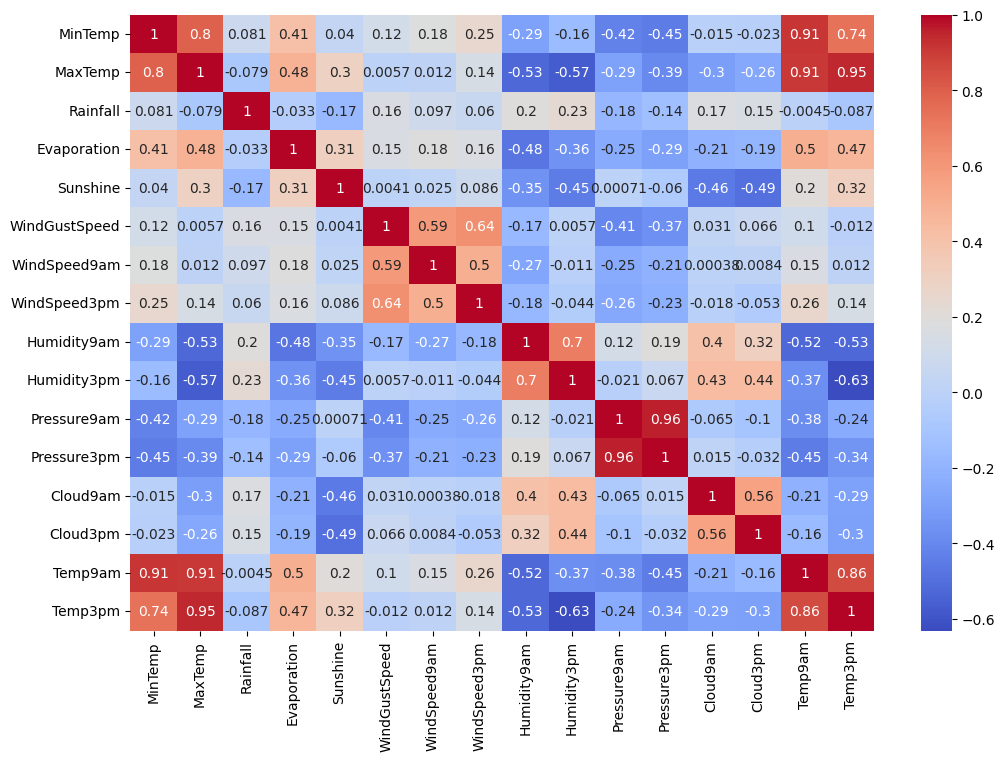

In [ ]:
# Matriz de correlación
corr_matrix = numerical_data.corr()

# Visualización con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

A partir de la matriz de correlación podemos concluir que:
- Pressure9am-Pressure3pm: existe una fuerte correlación positiva (0.96), casi perfecta se podría decir, ya que es probable que la presión atmosférica no varíe mucho entre la mañana y la tarde.
- MaxTemp-Temp3pm: tienen una fuerte correlación positiva (0.95), sugiriendo que la temperatura máxima se suele alcanzar durante la tarde.
- MinTemp-Temp9am: existe una fuerte correlación positiva (0.91), lo que se puede deber a que, durante la mañana, se alcance la temperatura mínima
- MaxTemp-Temp9am: hay una fuerte correlación positiva (0.91), lo que sugiere que la temperatura máxima está relacionada a la temperatura de las 9am.
- MinTemp-MaxTemp: tienen una fuerte correlación positiva (0.8), lo que sugiere que si la temperatura mínima aumenta, es probable que también aumente la temperatura máxima.

######Boxplot individual de cada variable en función de las ciudades elegidas

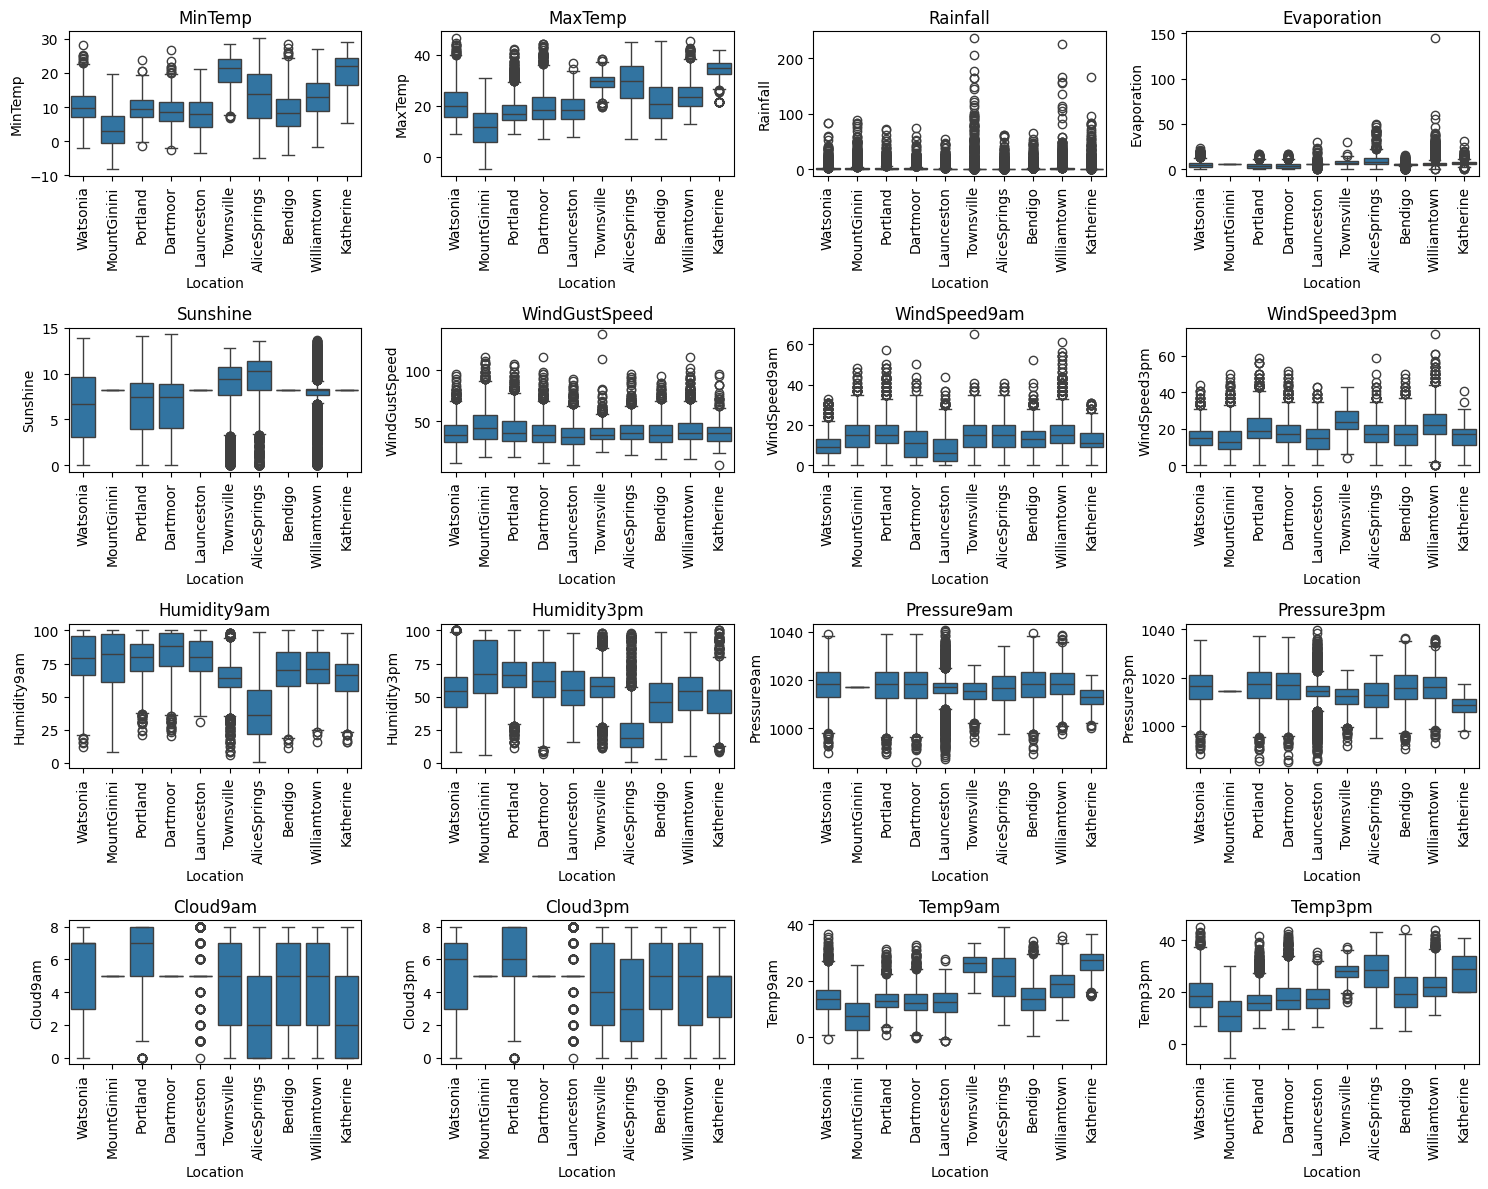

In [ ]:
plt.figure(figsize=(15, 12))
# Iteramos sobre cada variable numérica
for i, column in enumerate(numerical_data, 1):
    plt.subplot(4, 4, i)  # Ajustamos a una cuadrícula de 4x4 para 16 variables
    sns.boxplot(x='Location', y=column, data=data_train)
    plt.title(column)
    plt.xticks(rotation=90)  # Rotamos las etiquetas de las ciudades para mayor legibilidad

plt.tight_layout()  # Aseguramos que los gráficos no se solapen
plt.show()

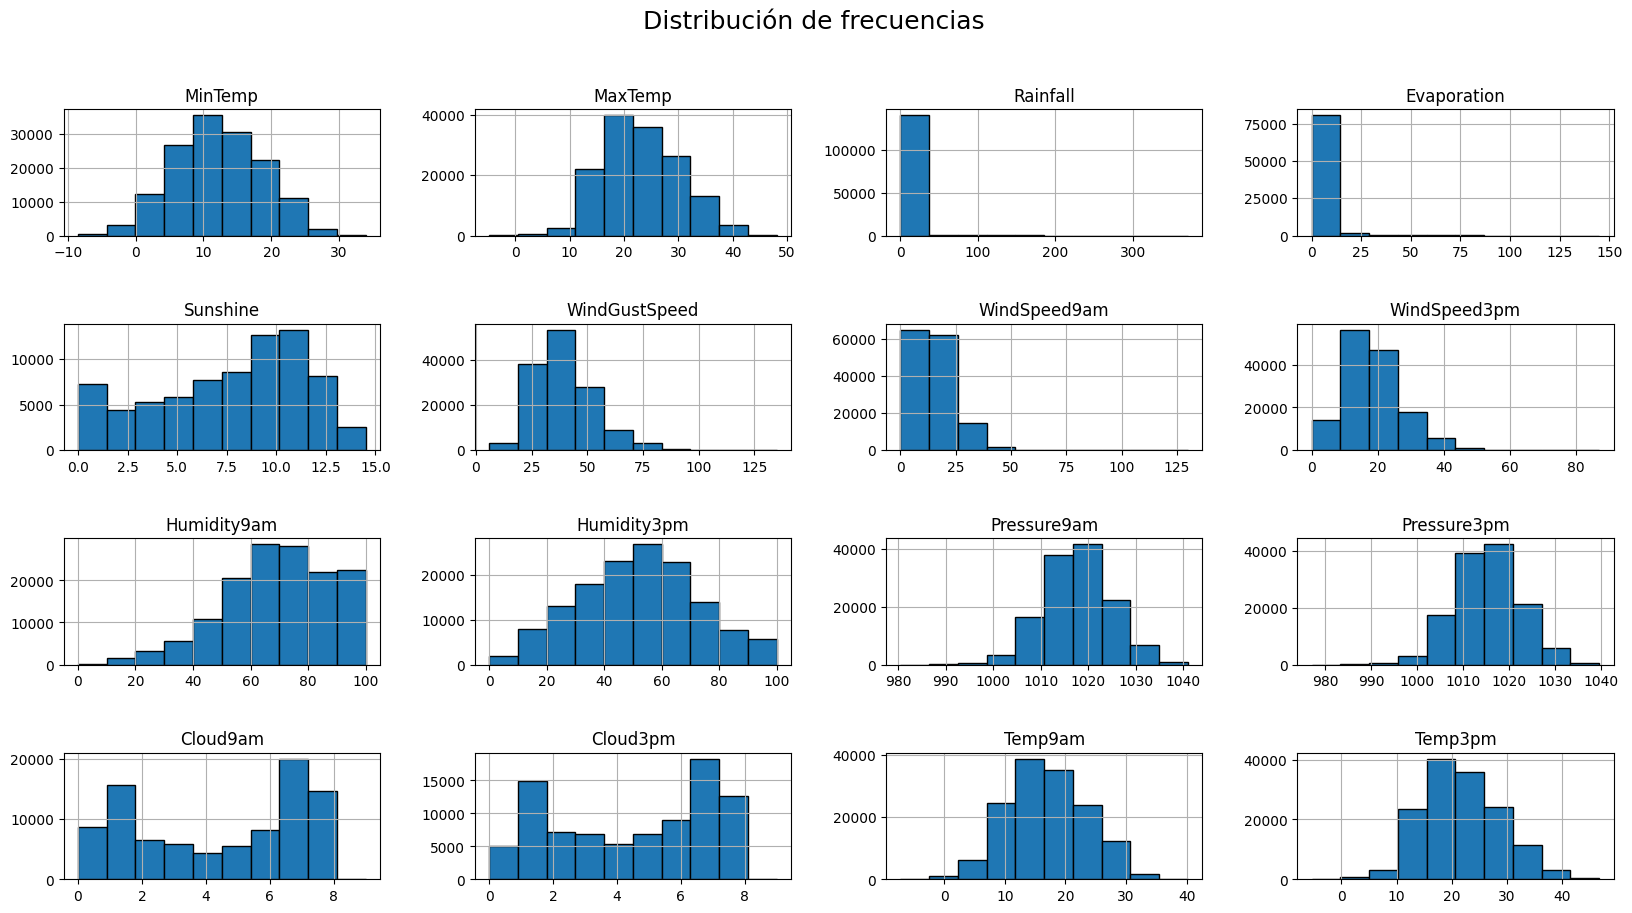

In [ ]:
data.drop(axis=1,columns='RainTomorrow').hist(figsize=(20,10),bins=10,edgecolor='black')
plt.subplots_adjust(hspace=0.7)
plt.suptitle('Distribución de frecuencias', fontsize=18)
plt.show()

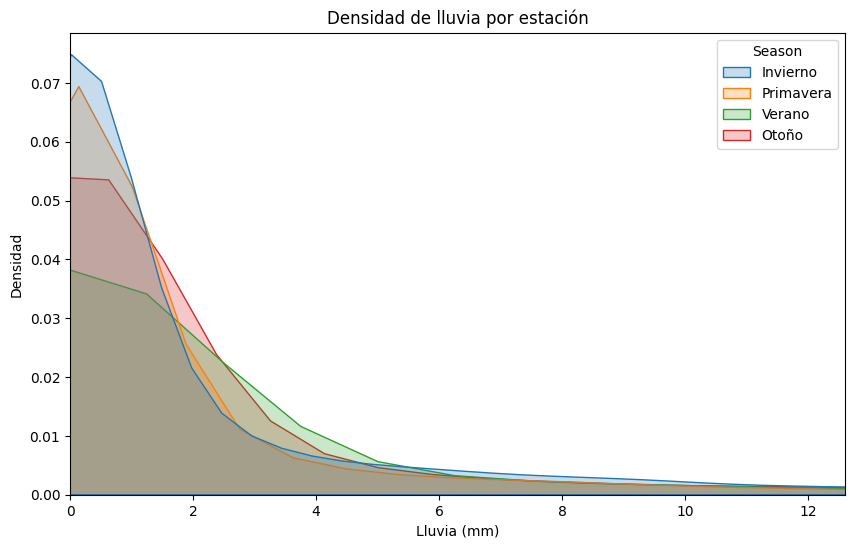

In [ ]:
# Diagrama de densidad de la variable de lluvia por estación
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_train, x='Rainfall', hue='Season', fill=True)
plt.title('Densidad de lluvia por estación')
plt.xlabel('Lluvia (mm)')
plt.ylabel('Densidad')
plt.xlim(0, data_train['Rainfall'].quantile(0.95))  # Limita el eje x al percentil 95 para mejorar la visualización
plt.show()

#####Este gráfico nos permite ver cómo varía la densidad de lluvia a lo largo del año en las distintas estaciones, siendo invierno la estación con mayor densidad de precipitaciones y verano la que tiene una menor densidad

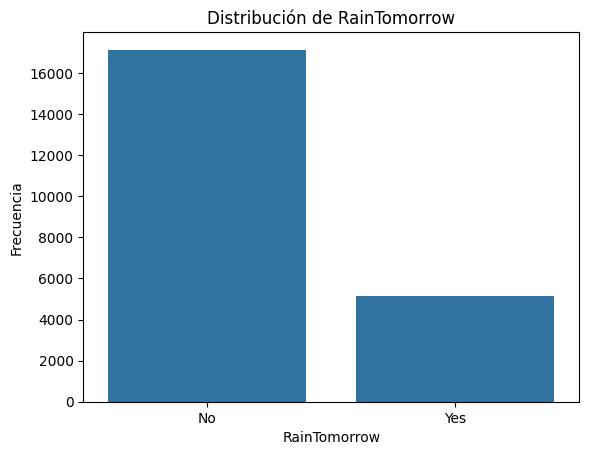

In [ ]:
#Verificamos si nuestro dataset está balanceado o no

# Contamos los valores en nuestra variable objetivo
data_train['RainTomorrow'].value_counts(normalize=True)

# Graficamos para visualizar el balance de 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=data_train)
plt.title('Distribución de RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar claramente que nuestro dataset está desbalanceado por la notable diferencia entre los dos valores, ya que contamos con más datos 'No' lluvia que de 'Sí'.

Creemos que se hace esta pregunta para analizar cuestiones que puedan surgir a futuro en nuestro modelo y cómo esto lo afecta.